## 6.2.1 重みの初期値を０にする？

過学習を抑え、汎化性能を高めるテクニックとして、この後、Weight decay(荷重減衰）という手法を紹介します。 \
Weight decayとは、簡単に言えば、重みパラメータの値が小さくなるように学習を行う事を目的とした手法です。重みの値を小さくすることで、過学習が起きにくくなります。 \
重みを小さいに値にしたければ、初期値もできるだけ小さい値からスタートするのが正攻法でしょう。実際、これまで重みの初期値は、$0.01 * np.random.randn(10, 100)$のように、ガウス分布から生成される値を0.01倍した小さな値（標準偏差が0.01のガウス分布）を用いました。 \
重みの値を小さくいたいというのであれば、重みの初期値をすべて０に設定する、というのはどうでしょうか。答えを先に言ってしまうと、正しい学習が行えません。 \
なぜ、重みの初期値を０ににしてはいけない（正確には、重みを均一な値に設定してはいけない）のでしょうか。それは、誤差逆伝播法において、全ての重みの値が均一に（同じように）更新されてしまうからです。 \
この「重みが均一になってしまうこと」を防ぐ（正確には、重みの対照的な構造を崩す）ために、ランダムな初期値が必要なのです。

## 6.2.2　隠れ層のアクティベーション分布

５層のニューラルネットワークに、ランダムに生成したデータを流し、各層のアクティベーションのデータ分布をヒストグラムで描画します。 \
ここでは５つの層のそれぞれが、１００個のニューロンを持つものとします。そして、入力データとして１０００個のデータをガウス分布でランダムに生成し、５層ニューラルネットワークに流します。活性化関数にシグモイド関数を利用します。 \
このコードで注意すべき点は、重みのスケールについてです。このスケールを変えることで、アクティベーションの分布がどのように変化するかを観察することが、この実験の目的です。

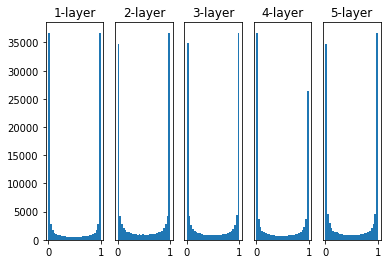

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

重みの初期値として標準偏差が１のガウス分布を用いています。 \
各層のアクティベーション分布は０と１に偏った分布になっている事がわかります。

次に標準偏差を0.01としたガウス分布の場合、各層のアクティベーションの分布は下のようになります。 \
今度は、0.5付近に集中する分布となりました。先ほどの例のように０と１への偏りはないので、勾配消失の問題は起きていません。しかく、アクティベーションに偏りあるということは、表現力の点で大きなお問題があります。なぜなら、複数のニューロンがほとんど同じ値を出力するとすれば、複数のニューロンが存在する意味がなくなってしまうからです。

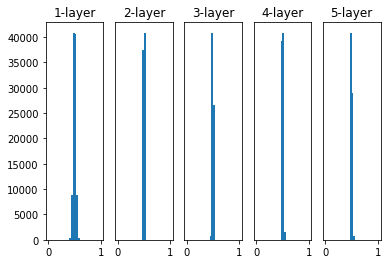

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

続いて、「Xavierの初期値」を使ってみたいと思います。 \
「Xavierの初期値」を用いると、前層のノードの数が多ければ多いほど、対象ノードの初期値として設定する重みのスケールは小さくなります。
「Xavierの初期値」を使った結果は下のようになります。この結果を見ると、上位の層に行くにつれて、ややいびつな形になりますが、これまでよりも広がりがあるので、シグモイド関数の表現も制限されることなく、効率的に学習が行えることが期待できます。

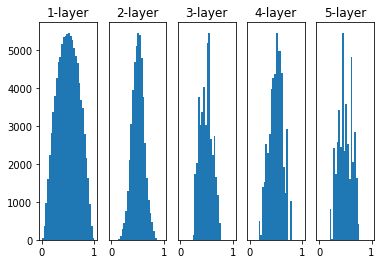

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.2.3　ReLUの場合の重みの初期値


「Xavierの初期値」は、活性化関数が線形であることを前提に導いた結果です。`sigmoid`関数や`tanh`関数は左右対称で中央付近が線形関数としてみなせるので、「Xavierの初期値」が適してします。一方、ReLUを用いる場合は、ReLUに特化した初期値を用いる事が推奨されています。それは、「Heの初期値」です。 \
「Heの初期値」は前層のノードの数が、ｎ個の場合、$\sqrt{\frac{2}{n}}$を標準偏差とするガウス分布を用います。「Xavierの初期値」が$\sqrt{\frac{1}{n}}$であったことを考えると、ReLUの場合は負の領域が０になるため、より広がりを持たせるために倍の係数が必要になると（直感的には）解釈できます。

## 6.2.4 MINSTデータセットによる重みの初期値の比較

===========iteration:0===========
std=0.01:2.3025207035983497
Xavier:2.3129893850623473
He:2.365530489849057
===========iteration:100===========
std=0.01:2.3020577857424556
Xavier:2.263314802291702
He:1.79220803943551
===========iteration:200===========
std=0.01:2.30229598464096
Xavier:2.196263132052474
He:0.9932716882297774
===========iteration:300===========
std=0.01:2.2993620821223435
Xavier:1.8634845283646277
He:0.5294422986575256
===========iteration:400===========
std=0.01:2.3022093333956954
Xavier:1.4401164749979056
He:0.5147844466744378
===========iteration:500===========
std=0.01:2.300489342694332
Xavier:0.9505699743917322
He:0.40549792705451587
===========iteration:600===========
std=0.01:2.299440536405686
Xavier:0.737551402123091
He:0.36804357149804134
===========iteration:700===========
std=0.01:2.2995353904392
Xavier:0.5954779997001205
He:0.3249348144786473
===========iteration:800===========
std=0.01:2.3039366550370715
Xavier:0.5247066884758522
He:0.28919377749137937
====

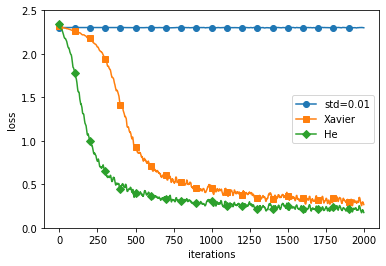

In [1]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()